In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import json
import base64
import numpy as np
import sys

In [2]:
file_paths = glob.glob("C:/Users/rahul/OneDrive/Documents/APPM Spring '24/5. SpectrumX - Research Assistant/Boulder V3.4 Data for 1 day/*")

df=pd.DataFrame(columns=["timestamp","dbm","freq_array"])

for file_path in file_paths:
    with open(file_path, 'r') as handle:
        input = json.load(handle)
    dt = np.dtype(input["type"])
    data = np.frombuffer(base64.b64decode(input["data"]), dtype=dt)
    timestamp=input['timestamp']
    dbm = 10*np.log10(data) + 30
    freq_array = np.linspace(input['metadata']['fmin'], input['metadata']['fmax'], input['metadata']['nfft'])
    df2=pd.DataFrame([[timestamp,dbm,freq_array]],columns=["timestamp","dbm","freq_array"])
       
    df=pd.concat([df,df2],ignore_index=True)


In [3]:
df.head()

,timestamp,dbm,freq_array
0,2024-06-06T00:20:20.576996+00:00,"[-86.5965, -80.21614, -80.85448, -84.14949, -8...","[1988000000.0, 1988023460.4105573, 1988046920...."
1,2024-06-06T00:21:15.401097+00:00,"[-89.7206, -83.58532, -84.16726, -84.48254, -8...","[1988000000.0, 1988023460.4105573, 1988046920...."
2,2024-06-06T00:30:21.749868+00:00,"[-89.89621, -82.96375, -83.64654, -87.29402, -...","[1988000000.0, 1988023460.4105573, 1988046920...."
3,2024-06-06T00:21:21.377136+00:00,"[-87.5681, -82.326004, -83.9425, -84.70745, -8...","[1988000000.0, 1988023460.4105573, 1988046920...."
4,2024-06-06T00:21:27.319539+00:00,"[-90.777855, -83.815125, -84.43564, -84.98004,...","[1988000000.0, 1988023460.4105573, 1988046920...."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3478 entries, 0 to 3477
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   timestamp   3478 non-null   object
 1   dbm         3478 non-null   object
 2   freq_array  3478 non-null   object
dtypes: object(3)
memory usage: 81.6+ KB


In [6]:
df_sorted = df.sort_values(by='timestamp', ascending=True)

In [7]:
df_sorted.head()

,timestamp,dbm,freq_array
3477,2024-06-06T00:20:14.565329+00:00,"[-86.69133, -81.99492, -83.33794, -81.62896, -...","[1988000000.0, 1988023460.4105573, 1988046920...."
0,2024-06-06T00:20:20.576996+00:00,"[-86.5965, -80.21614, -80.85448, -84.14949, -8...","[1988000000.0, 1988023460.4105573, 1988046920...."
12,2024-06-06T00:20:26.751602+00:00,"[-90.61838, -84.42364, -85.21776, -87.26418, -...","[1988000000.0, 1988023460.4105573, 1988046920...."
23,2024-06-06T00:20:32.746042+00:00,"[-88.78526, -83.76168, -82.49345, -85.09296, -...","[1988000000.0, 1988023460.4105573, 1988046920...."
34,2024-06-06T00:20:38.771103+00:00,"[-85.15739, -80.18978, -80.5854, -83.510345, -...","[1988000000.0, 1988023460.4105573, 1988046920...."


In [8]:
print(df_sorted)

                             timestamp  \
3477  2024-06-06T00:20:14.565329+00:00   
0     2024-06-06T00:20:20.576996+00:00   
12    2024-06-06T00:20:26.751602+00:00   
23    2024-06-06T00:20:32.746042+00:00   
34    2024-06-06T00:20:38.771103+00:00   
...                                ...   
3472  2024-06-06T06:12:21.074851+00:00   
3473  2024-06-06T06:12:27.069435+00:00   
3474  2024-06-06T06:12:33.236733+00:00   
3475  2024-06-06T06:12:39.420138+00:00   
3476  2024-06-06T06:12:45.397043+00:00   

                                                    dbm  \
3477  [-86.69133, -81.99492, -83.33794, -81.62896, -...   
0     [-86.5965, -80.21614, -80.85448, -84.14949, -8...   
12    [-90.61838, -84.42364, -85.21776, -87.26418, -...   
23    [-88.78526, -83.76168, -82.49345, -85.09296, -...   
34    [-85.15739, -80.18978, -80.5854, -83.510345, -...   
...                                                 ...   
3472  [-88.82994, -84.248184, -86.14783, -91.21178, ...   
3473  [-87.070786, -80.

In [15]:
df_sorted.to_csv('data_sorted_3.csv', index=False)

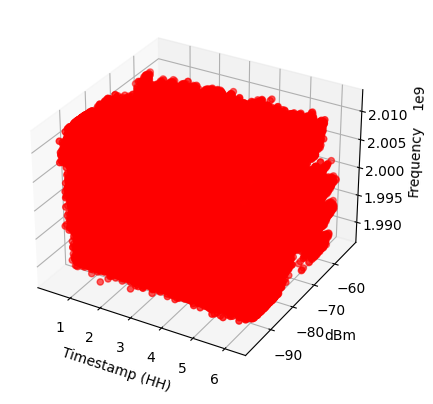

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Convert timestamp to datetime and extract hours
df_sorted['timestamp'] = pd.to_datetime(df_sorted['timestamp'])
df_sorted['hour'] = df_sorted['timestamp'].dt.hour + df_sorted['timestamp'].dt.minute / 60 + df_sorted['timestamp'].dt.second / 3600

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Flatten dbm and freq_array columns for plotting
dbm_flat = [item for sublist in df_sorted['dbm'].tolist() for item in sublist]
freq_flat = [item for sublist in df_sorted['freq_array'].tolist() for item in sublist]
timestamp_flat = df_sorted['hour'].repeat(len(df_sorted['dbm'].iloc[0])).tolist()

ax.scatter(timestamp_flat, dbm_flat, freq_flat, c='r', marker='o')

ax.set_xlabel('Timestamp (HH)')
ax.set_ylabel('dBm')
ax.set_zlabel('Frequency')

plt.show()


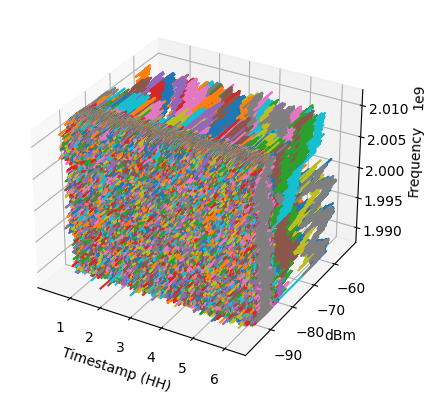

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Convert timestamp to datetime and extract hours
df_sorted['timestamp'] = pd.to_datetime(df_sorted['timestamp'])
df_sorted['hour'] = df_sorted['timestamp'].dt.hour + df_sorted['timestamp'].dt.minute / 60 + df_sorted['timestamp'].dt.second / 3600

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot line for each row in the dataframe
for index, row in df_sorted.iterrows():
    hours = [row['hour']] * len(row['dbm'])
    ax.plot(hours, row['dbm'], row['freq_array'], label=f'Row {index}')

ax.set_xlabel('Timestamp (HH)')
ax.set_ylabel('dBm')
ax.set_zlabel('Frequency')
plt.show()


# 3D Line plot

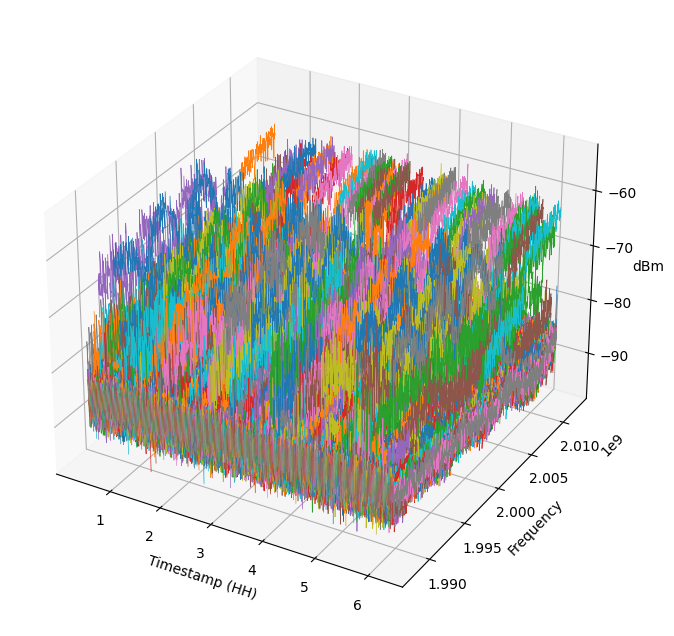

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Convert timestamp to datetime and extract hours
df_sorted['timestamp'] = pd.to_datetime(df_sorted['timestamp'])
df_sorted['hour'] = df_sorted['timestamp'].dt.hour + df_sorted['timestamp'].dt.minute / 60 + df_sorted['timestamp'].dt.second / 3600

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot line for each row in the dataframe
for index, row in df_sorted.iterrows():
    hours = [row['hour']] * len(row['dbm'])
    ax.plot(hours, row['freq_array'], row['dbm'],linewidth=0.5, label=f'Row {index}')

ax.set_xlabel('Timestamp (HH)')
ax.set_ylabel('Frequency')
ax.set_zlabel('dBm')
plt.show()


# 3D Line plot - Sampled

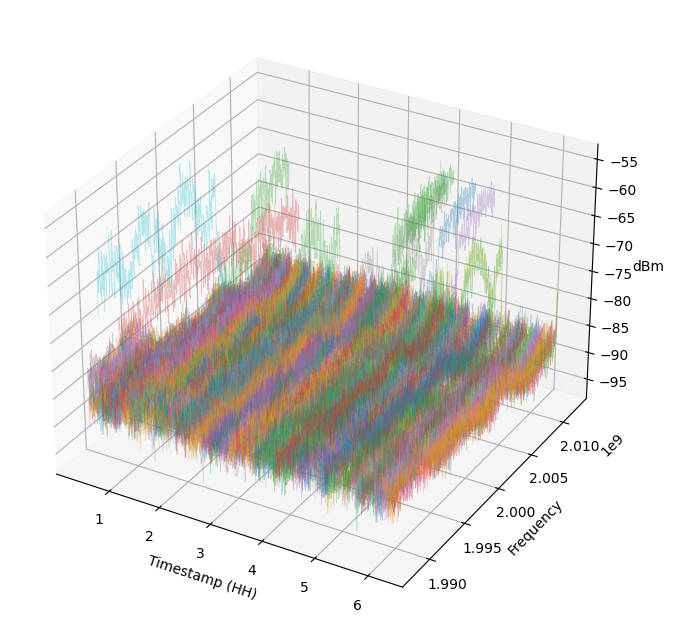

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Convert timestamp to datetime and extract hours
df_sorted['timestamp'] = pd.to_datetime(df_sorted['timestamp'])
df_sorted['hour'] = df_sorted['timestamp'].dt.hour + df_sorted['timestamp'].dt.minute / 60 + df_sorted['timestamp'].dt.second / 3600

# Sample a subset of the data
sampled_df = df_sorted.sample(frac=0.1, random_state=42)

# Create 3D plot with enlarged figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot line for each row in the sampled dataframe with thinner lines and transparency
for index, row in sampled_df.iterrows():
    hours = [row['hour']] * len(row['dbm'])
    ax.plot(hours, row['freq_array'], row['dbm'], linewidth=0.5, alpha=0.3)

ax.set_xlabel('Timestamp (HH)')
ax.set_ylabel('Frequency')
ax.set_zlabel('dBm')
plt.show()


# 3D Surface plot

(3478, 1024)
(3478, 1024)
(3478, 1024)


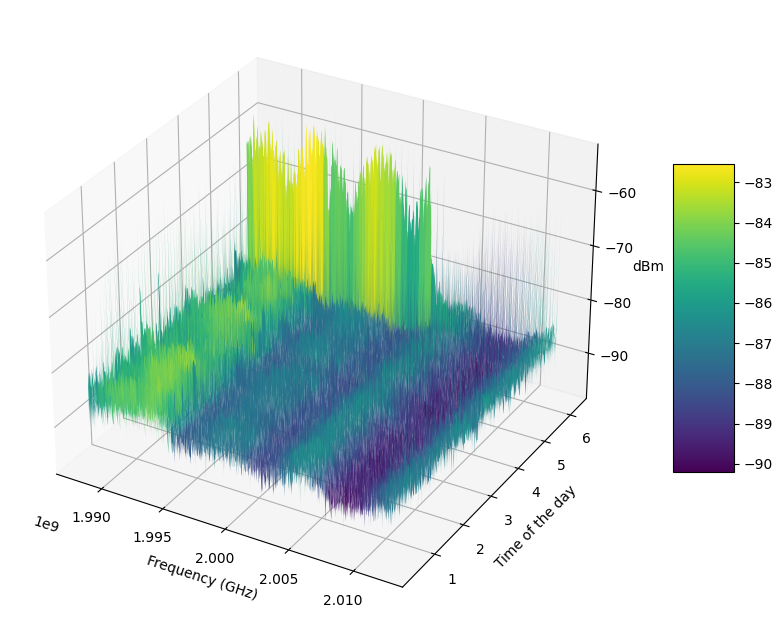

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np
#%matplotlib notebook

# Convert timestamp to datetime and extract hours
df_sorted['timestamp'] = pd.to_datetime(df_sorted['timestamp'])
df_sorted['hour'] = df_sorted['timestamp'].dt.hour + df_sorted['timestamp'].dt.minute / 60 + df_sorted['timestamp'].dt.second / 3600

# Sample a subset of the data
#sampled_df = df_sorted.sample(frac=1, random_state=42)

# Flatten the data for grid interpolation
hours = np.repeat(df_sorted['hour'].values, len(df_sorted['dbm'].iloc[0]))
frequencies = np.concatenate(df_sorted['freq_array'].values)
dbm_values = np.concatenate(df_sorted['dbm'].values)

# Create grid data

X = np.arange(min(hours),max(hours), (max(hours)-min(hours))/3478)
Y = np.arange(min(frequencies),max(frequencies), (max(frequencies)-min(frequencies))/1024)

grid_x, grid_y = np.meshgrid(Y,X)
grid_z = np.resize(dbm_values,(int(dbm_values.shape[0]/1024),1024)) #griddata((hours, frequencies), dbm_values, (grid_x, grid_y), method='cubic')

print(grid_z.shape)
print(grid_x.shape)
print(grid_y.shape)
#np.resize(a,(2,1024))
# Create 3D plot with enlarged figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis', edgecolor='none')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Time of the day')
ax.set_zlabel('dBm')

plt.show()


In [2]:
# code to get an interactive Surface plot

'''
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.offline as py

# Assuming df_sorted is already defined and has the appropriate structure

# Convert timestamp to datetime and extract hours
df_sorted['timestamp'] = pd.to_datetime(df_sorted['timestamp'])
df_sorted['hour'] = df_sorted['timestamp'].dt.hour + df_sorted['timestamp'].dt.minute / 60 + df_sorted['timestamp'].dt.second / 3600

# Flatten the data for grid interpolation
hours = np.repeat(df_sorted['hour'].values, len(df_sorted['dbm'].iloc[0]))
frequencies = np.concatenate(df_sorted['freq_array'].values)
dbm_values = np.concatenate(df_sorted['dbm'].values)

# Create grid data
X = np.arange(min(hours), max(hours), (max(hours) - min(hours)) / 3478)
Y = np.arange(min(frequencies), max(frequencies), (max(frequencies) - min(frequencies)) / 1024)

grid_x, grid_y = np.meshgrid(Y, X)
grid_z = np.resize(dbm_values, (int(dbm_values.shape[0] / 1024), 1024))

# Create 3D surface plot using plotly
fig = go.Figure(data=[go.Surface(z=grid_z, x=grid_x, y=grid_y, colorscale='Viridis')])

fig.update_layout(
    title='3D Surface Plot of dBm Values',
    scene=dict(
        xaxis_title='Frequency (GHz)',
        yaxis_title='Time of the day',
        zaxis_title='dBm'
    ),
    width=800,
    height=800,
    margin=dict(l=65, r=50, b=65, t=90)
)

# Display the plot
py.iplot(fig)
'''

"\nimport pandas as pd\nimport numpy as np\nimport plotly.graph_objs as go\nimport plotly.offline as py\n\n# Assuming df_sorted is already defined and has the appropriate structure\n\n# Convert timestamp to datetime and extract hours\ndf_sorted['timestamp'] = pd.to_datetime(df_sorted['timestamp'])\ndf_sorted['hour'] = df_sorted['timestamp'].dt.hour + df_sorted['timestamp'].dt.minute / 60 + df_sorted['timestamp'].dt.second / 3600\n\n# Flatten the data for grid interpolation\nhours = np.repeat(df_sorted['hour'].values, len(df_sorted['dbm'].iloc[0]))\nfrequencies = np.concatenate(df_sorted['freq_array'].values)\ndbm_values = np.concatenate(df_sorted['dbm'].values)\n\n# Create grid data\nX = np.arange(min(hours), max(hours), (max(hours) - min(hours)) / 3478)\nY = np.arange(min(frequencies), max(frequencies), (max(frequencies) - min(frequencies)) / 1024)\n\ngrid_x, grid_y = np.meshgrid(Y, X)\ngrid_z = np.resize(dbm_values, (int(dbm_values.shape[0] / 1024), 1024))\n\n# Create 3D surface plot

# 3D wireframe plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Convert timestamp to datetime and extract hours
df_sorted['timestamp'] = pd.to_datetime(df_sorted['timestamp'])
df_sorted['hour'] = df_sorted['timestamp'].dt.hour + df_sorted['timestamp'].dt.minute / 60 + df_sorted['timestamp'].dt.second / 3600

# Sample a subset of the data
sampled_df = df_sorted.sample(frac=0.1, random_state=42)

# Flatten the data for grid interpolation
hours = np.repeat(sampled_df['hour'].values, len(sampled_df['dbm'].iloc[0]))
frequencies = np.concatenate(sampled_df['freq_array'].values)
dbm_values = np.concatenate(sampled_df['dbm'].values)

# Create grid data
grid_x, grid_y = np.mgrid[min(hours):max(hours):100j, min(frequencies):max(frequencies):100j]
grid_z = griddata((hours, frequencies), dbm_values, (grid_x, grid_y), method='cubic')

# Create 3D plot with enlarged figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the wireframe
wire = ax.plot_wireframe(grid_x, grid_y, grid_z)

ax.set_xlabel('Time (Hour of a day)')
ax.set_ylabel('Frequency (GHz)')
ax.set_zlabel('dBm')

plt.show()


# 3D Contour plot

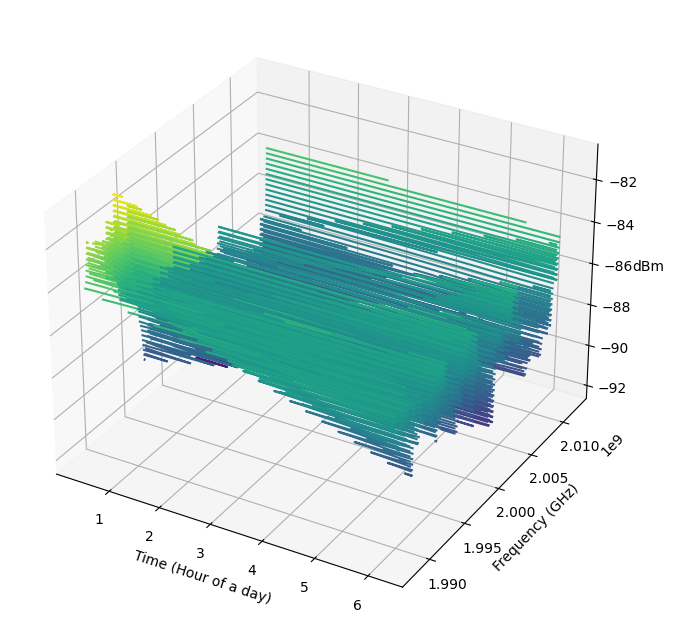

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Convert timestamp to datetime and extract hours
df_sorted['timestamp'] = pd.to_datetime(df_sorted['timestamp'])
df_sorted['hour'] = df_sorted['timestamp'].dt.hour + df_sorted['timestamp'].dt.minute / 60 + df_sorted['timestamp'].dt.second / 3600

# Sample a subset of the data
sampled_df = df_sorted.sample(frac=0.1, random_state=42)

# Flatten the data for grid interpolation
hours = np.repeat(sampled_df['hour'].values, len(sampled_df['dbm'].iloc[0]))
frequencies = np.concatenate(sampled_df['freq_array'].values)
dbm_values = np.concatenate(sampled_df['dbm'].values)

# Create grid data
grid_x, grid_y = np.mgrid[min(hours):max(hours):100j, min(frequencies):max(frequencies):100j]
grid_z = griddata((hours, frequencies), dbm_values, (grid_x, grid_y), method='cubic')

# Create 3D plot with enlarged figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the contour
contour = ax.contour3D(grid_x, grid_y, grid_z, 50, cmap='viridis')

ax.set_xlabel('Time (Hour of a day)')
ax.set_ylabel('Frequency (GHz)')
ax.set_zlabel('dBm')

plt.show()
